In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

In [2]:
file=r'C:\Users\user\Desktop\iis_airbox_202010{}.csv'
# file=r'C:\Users\student\Desktop\iis_airbox_202010{}.csv'
res=pd.read_csv(file.format('01'))
for i in range(1,13):
    tmp_read=pd.read_csv(file.format(str(i).zfill(2)))
    res=pd.concat([res,tmp_read],verify_integrity=True,join="inner", ignore_index = True)
res    


,device_id,SiteName,PM25,timestamp
0,74DA38B05400,雲林縣立石榴國小(2017),21,2020-10-01 00:00:00
1,08BEAC0A02D8,臺中市立中山國小(2019),12,2020-10-01 00:00:00
2,08BEAC0A0476,雲林縣縣立古坑國小(2019),25,2020-10-01 00:00:00
3,74DA38F20DD0,高雄市市立樂群國小(2018),4,2020-10-01 00:00:00
4,08BEAC0A0030,臺中市立潭陽國小(2019),6,2020-10-01 00:00:01
...,...,...,...,...
4385037,08BEAC0A06D2,臺南市市立德南國小(2019),19,2020-10-12 23:59:47
4385038,08BEAC0A0194,臺中市立文昌國小(2019),20,2020-10-12 23:59:47
4385039,08BEAC0A06A8,臺南市市立頂洲國小(2019),14,2020-10-12 23:59:49
4385040,08BEAC09FFEC,臺中市立東寶國小(2019),20,2020-10-12 23:59:49


In [3]:
# for i,j in zip(res.SiteName,res.index):
#     if(i.split('市')[0]==''):
#         res.iloc[j][j]='台北'+i.split('市')[1]

In [4]:
# res.to_csv('out1.csv')

In [5]:
taichung_mask=res.SiteName.str.contains('臺中')
kaohsiung_mask=res.SiteName.str.contains('高雄')
taipei_mask=res.SiteName.str.contains(r'^市',regex=True, case=False)
taichung_df=res[taichung_mask]
kaohsiung_df=res[kaohsiung_mask]
taipei_df=res[taipei_mask]

In [14]:
# taichung_df[taichung_df["PM25"]>100]
# taichung_df.iloc[1]
# taipei_df

,device_id,SiteName,PM25,timestamp
64,74DA38F20D2E,市立中山國中(2018),30,2020-10-01 00:00:14
73,74DA38F7C5BA,市立東湖國中(2018),41,2020-10-01 00:00:15
86,74DA38F7C3D6,市立懷生國小(2018),24,2020-10-01 00:00:18
91,74DA38F21136,市立立農國小(2018),30,2020-10-01 00:00:19
106,74DA38F7C3DC,市立武功國小(2018),20,2020-10-01 00:00:22
...,...,...,...,...
4384713,74DA38F7C34A,市立大橋國小(2018),4,2020-10-12 23:58:11
4384725,74DA38F21094,市立劍潭國小(2018),3,2020-10-12 23:58:15
4384747,74DA38F21088,市立新湖國小(2018),5,2020-10-12 23:58:19
4384765,74DA38F7C3E6,市立老松國小(2018),4,2020-10-12 23:58:22


In [15]:
pd.set_option('mode.chained_assignment', None)
taichung_df['city']=taichung_df['SiteName'].str[0:3]
kaohsiung_df['city']=kaohsiung_df['SiteName'].str[0:3]
taipei_df['city']=taipei_df['SiteName'].str[0:3]

taichung_df['day']=taichung_df['timestamp'].str.split(' ',expand=True)[0]
kaohsiung_df['day']=kaohsiung_df['timestamp'].str.split(' ',expand=True)[0]
taipei_df['day']=taipei_df['timestamp'].str.split(' ',expand=True)[0]

taichung_df['time']=(taichung_df['timestamp'].str.split(':',expand=True)[0]).str.split(' ',expand=True)[1]
kaohsiung_df['time']=(kaohsiung_df['timestamp'].str.split(':',expand=True)[0]).str.split(' ',expand=True)[1]
taipei_df['time']=(taipei_df['timestamp'].str.split(':',expand=True)[0]).str.split(' ',expand=True)[1]

# kaohsiung_df
taichung_df

,device_id,SiteName,PM25,timestamp,city,day,time
1,08BEAC0A02D8,臺中市立中山國小(2019),12,2020-10-01 00:00:00,臺中市,2020-10-01,00
4,08BEAC0A0030,臺中市立潭陽國小(2019),6,2020-10-01 00:00:01,臺中市,2020-10-01,00
8,08BEAC09FFE8,臺中市立臺中家商(2019),7,2020-10-01 00:00:02,臺中市,2020-10-01,00
12,08BEAC0A008E,臺中市立益民國小(2019),8,2020-10-01 00:00:03,臺中市,2020-10-01,00
13,08BEAC09FF42,臺中市立光正國中(2019),18,2020-10-01 00:00:03,臺中市,2020-10-01,00
...,...,...,...,...,...,...,...
4385029,08BEAC0A03F2,臺中市立和平國小(2019),17,2020-10-12 23:59:44,臺中市,2020-10-12,23
4385030,08BEAC0A0360,臺中市立何厝國小(2019),16,2020-10-12 23:59:45,臺中市,2020-10-12,23
4385032,08BEAC0A009A,臺中市立大甲高工(2019),13,2020-10-12 23:59:45,臺中市,2020-10-12,23
4385038,08BEAC0A0194,臺中市立文昌國小(2019),20,2020-10-12 23:59:47,臺中市,2020-10-12,23


In [16]:
taichung_df[(taichung_df["time"]=="11") & (taichung_df["PM25"]>1000)]
mask=(taichung_df["PM25"]>1000)
taichung_df=taichung_df[~mask]
# taichung_df[["time","PM25"]]
# kaohsiung_df[["time","PM25"]]

In [17]:
avg_taichung_df=taichung_df.groupby("time").mean()

In [18]:
avg_kaohsiung_df=kaohsiung_df.groupby("time").mean()

In [19]:
avg_taipei_df_df=taipei_df.groupby("time").mean()


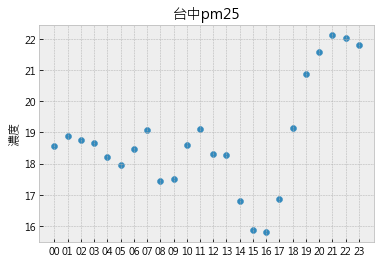

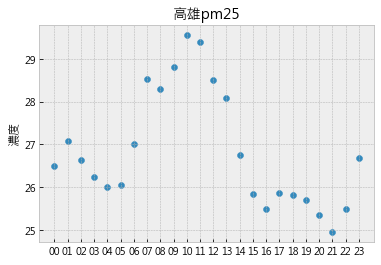

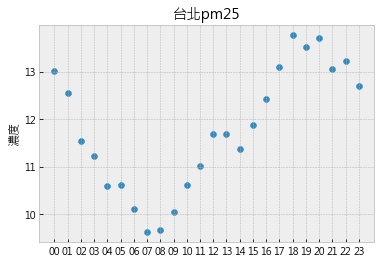

In [23]:
plt.title("台中pm25")
plt.ylabel("濃度")

# plt.scatter(taichung_df["day"],taichung_df["PM25"])
# avg_taichung_df.plot.scatter(x = "index", y = 'value')
plt.scatter(avg_taichung_df.index,avg_taichung_df)
plt.show()

plt.title("高雄pm25")
plt.ylabel("濃度")

# plt.scatter(kaohsiung_df["day"],kaohsiung_df["PM25"])
plt.scatter(avg_kaohsiung_df.index,avg_kaohsiung_df)

plt.show()

plt.title("台北pm25")
plt.ylabel("濃度")

# plt.scatter(kaohsiung_df["day"],kaohsiung_df["PM25"])
plt.scatter(avg_taipei_df_df.index,avg_taipei_df_df)

plt.show()

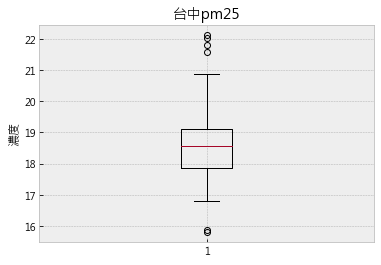

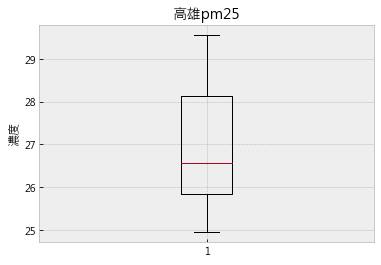

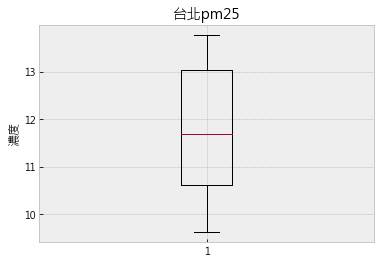

In [21]:
plt.title("台中pm25")
plt.ylabel("濃度")

# fig,ax=plt.subplots()
# ax.set_title('pm25')
# plt.boxplot([taichung_df["PM25"],kaohsiung_df["PM25"]],['台中','高雄'])
plt.boxplot(avg_taichung_df["PM25"])
plt.show()

plt.title("高雄pm25")
plt.ylabel("濃度")
plt.boxplot(avg_kaohsiung_df["PM25"])
plt.show()
# taichung_df["PM25"]

plt.title("台北pm25")
plt.ylabel("濃度")
plt.boxplot(avg_taipei_df_df["PM25"])
plt.show()

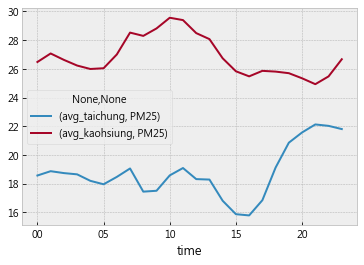

In [22]:

data = pd.concat({'avg_taichung':avg_taichung_df,'avg_kaohsiung':avg_kaohsiung_df},axis=1)
# plt.plot(taichung_df["timestamp":"PM25"],linestyle='-',linewidth=0.5)
# plt.plot(kaohsiung_df[["timestamp","PM25"]],linestyle='-',linewidth=0.5)
# data
# plt.show()
# plt.ylabel("濃度")
data
data.plot.line()
# avg_taichung_df["PM25"].plot(kind="line")
# plt.title("台中pm25")

# avg_kaohsiung_df["PM25"].plot(kind="line")
# plt.title("高雄pm25")
# plt.show()

# res=pd.merge(taichung_df[["day","PM25"]],kaohsiung_df[["day","PM25"]],on='day',how='outer')

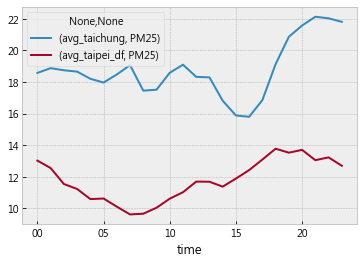

In [24]:

data = pd.concat({'avg_taichung':avg_taichung_df,'avg_taipei_df':avg_taipei_df_df},axis=1)
# plt.plot(taichung_df["timestamp":"PM25"],linestyle='-',linewidth=0.5)
# plt.plot(kaohsiung_df[["timestamp","PM25"]],linestyle='-',linewidth=0.5)
# data
# plt.show()
# plt.ylabel("濃度")
data
data.plot.line()